In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
PROC = Path("../data/processed/AAPL_clean.csv")
df = pd.read_csv(PROC, parse_dates=["Date"], index_col="Date")

In [3]:
split_point = int(len(df) * 0.8)
train = df.iloc[:split_point]
test = df.iloc[split_point:].copy()

In [4]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Close'], order=(6,3,1))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\jayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  160
Model:                 ARIMA(6, 3, 1)   Log Likelihood                -479.581
Date:                Tue, 16 Sep 2025   AIC                            975.161
Time:                        11:18:39   BIC                            999.611
Sample:                             0   HQIC                           985.091
                                - 160                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7827      0.094     -8.361      0.000      -0.966      -0.599
ar.L2         -0.3919      0.134     -2.926      0.003      -0.654      -0.129
ar.L3         -0.3595      0.106     -3.407      0.0

In [5]:
forecast = model_fit.forecast(steps=len(test))
test['ARIMA_Pred'] = forecast.values

c:\Users\jayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


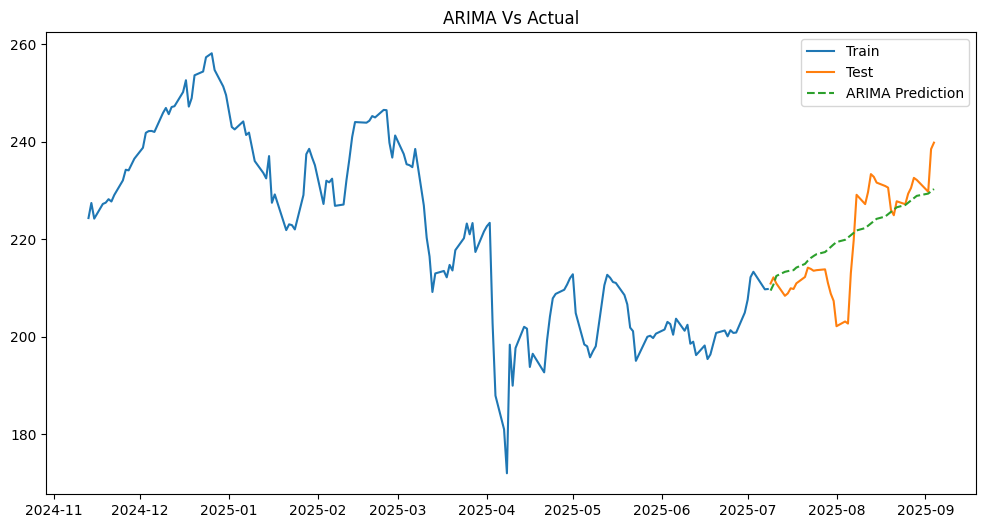

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(test['ARIMA_Pred'], label='ARIMA Prediction', linestyle='--')
plt.legend()
plt.title("ARIMA Vs Actual")
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test["Close"], test["ARIMA_Pred"]))
mae = mean_absolute_error(test["Close"], test["ARIMA_Pred"])
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")


RMSE: 6.99, MAE: 5.38


In [8]:
import sys
sys.path.append("../")
from src.utils.logger import log_metrics
log_metrics("ARIMA", rmse=rmse, mae=mae)

Metrics logged to ../data/models/mertics.csv
